# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Achmad Ardani Prasha
- **Email:** achmadardani7@gmail.com
- **ID Dicoding:** achmadardani

## Menentukan Pertanyaan Bisnis

### **1. Apa saja tren musiman dalam penyewaan sepeda, dan bagaimana variasinya antara pengguna terdaftar dan pengguna kasual?**

**Elemen SMART:**
- **Specific (Spesifik):** Meneliti tren musiman pada penyewaan sepeda untuk membedakan pengguna terdaftar dan pengguna kasual.
- **Measurable (Terukur):** Mengukur jumlah penyewaan sepeda berdasarkan musim (misalnya, musim panas, hujan, dan lainnya) serta kategori pengguna (terdaftar atau kasual).
- **Achievable (Dapat Dicapai):** Data tersedia dari catatan penyewaan sepeda berdasarkan musim dan kategori pengguna.
- **Relevant (Relevan):** Mengetahui perbedaan pola musiman dapat membantu dalam perencanaan stok sepeda dan promosi layanan.
- **Time-Bound (Berbatas Waktu):** Analisis dilakukan dalam periode satu tahun untuk mencakup semua musim.


### **2. Bagaimana kondisi cuaca (suhu, kelembapan, kecepatan angin) memengaruhi total penyewaan sepeda?**

**Elemen SMART:**
- **Specific (Spesifik):** Menganalisis pengaruh suhu, kelembapan, dan kecepatan angin terhadap jumlah penyewaan sepeda.
- **Measurable (Terukur):** Data cuaca seperti suhu (°C), kelembapan (%), dan kecepatan angin (km/jam) dibandingkan dengan jumlah total penyewaan.
- **Achievable (Dapat Dicapai):** Data cuaca dan penyewaan sepeda tersedia untuk dilakukan analisis.
- **Relevant (Relevan):** Membantu memahami kondisi cuaca yang mendukung atau menghambat penyewaan sepeda.
- **Time-Bound (Berbatas Waktu):** Analisis dilakukan untuk periode minimal satu tahun untuk mengidentifikasi pola cuaca.


### **3. Kapan jam puncak penyewaan selama hari kerja dibandingkan akhir pekan?**

**Elemen SMART:**
- **Specific (Spesifik):** Mengidentifikasi jam puncak penyewaan sepeda pada hari kerja dan akhir pekan.
- **Measurable (Terukur):** Menghitung jumlah penyewaan berdasarkan waktu dalam sehari (jam).
- **Achievable (Dapat Dicapai):** Data penyewaan berdasarkan waktu tersedia untuk dianalisis.
- **Relevant (Relevan):** Mengetahui pola ini membantu dalam pengelolaan logistik dan promosi.
- **Time-Bound (Berbatas Waktu):** Dilakukan analisis dalam rentang waktu satu bulan untuk memetakan pola mingguan.


### **4. Bagaimana hari libur memengaruhi jumlah penyewaan sepeda, dan apakah ada perbedaan antara pengguna terdaftar dan kasual?**

**Elemen SMART:**
- **Specific (Spesifik):** Mengukur dampak hari libur terhadap jumlah penyewaan untuk pengguna terdaftar dan kasual.
- **Measurable (Terukur):** Membandingkan jumlah penyewaan pada hari kerja biasa dengan hari libur.
- **Achievable (Dapat Dicapai):** Data penyewaan dan informasi hari libur nasional tersedia.
- **Relevant (Relevan):** Memahami dampak hari libur untuk perencanaan operasional dan promosi.
- **Time-Bound (Berbatas Waktu):** Analisis dilakukan dalam rentang satu tahun untuk mencakup semua hari libur.

### **5. Apa hubungan antara hari kerja dan pola penyewaan sepeda di berbagai musim?**

**Elemen SMART:**
- **Specific (Spesifik):** Menganalisis hubungan antara hari kerja dan pola penyewaan sepeda berdasarkan musim.
- **Measurable (Terukur):** Mengukur jumlah penyewaan pada hari kerja di setiap musim.
- **Achievable (Dapat Dicapai):** Data hari kerja dan penyewaan sepeda berdasarkan musim tersedia.
- **Relevant (Relevan):** Membantu memahami pola penggunaan sepeda oleh pekerja di berbagai musim.
- **Time-Bound (Berbatas Waktu):** Analisis dilakukan dalam periode satu tahun untuk mencakup semua musim dan hari kerja.

## Import Semua Packages/Library yang Digunakan

In [80]:
!pip install streamlit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import streamlit as st
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Data Wrangling

### Gathering Data

Data yang telah didapat disimpan di google drive, kemudian kita hubungkan google colab dengan google drive

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
hour_data = pd.read_csv('/content/drive/MyDrive/bike sharing/hour.csv')
day_data = pd.read_csv('/content/drive/MyDrive/bike sharing/day.csv')
print(hour_data.head())
print(day_data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   


**Karakteristik Dataset**

Baik **hour.csv** maupun **day.csv** memiliki field berikut, kecuali **hr** yang tidak tersedia di **day.csv**  

- **instant**: indeks rekaman  
- **dteday**: tanggal  
- **season**: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)  
- **yr**: tahun (0: 2011, 1: 2012)  
- **mnth**: bulan (1 sampai 12)  
- **hr**: jam (0 sampai 23)  
- **holiday**: apakah hari tersebut merupakan hari libur atau bukan (diambil dari [http://dchr.dc.gov/page/holiday-schedule](http://dchr.dc.gov/page/holiday-schedule))  
- **weekday**: hari dalam seminggu  
- **workingday**: jika hari tersebut bukan akhir pekan atau hari libur, bernilai 1, jika tidak, bernilai 0  
- **weathersit**:  
  - 1: Cerah, Sedikit berawan, Sebagian berawan  
  - 2: Kabut + Berawan, Kabut + Awan terputus, Kabut + Sedikit berawan, Kabut  
  - 3: Salju ringan, Hujan ringan + Petir + Awan terputus, Hujan ringan + Awan terputus  
  - 4: Hujan deras + Es + Petir + Kabut, Salju + Kabut  
- **temp**: Suhu normalisasi dalam Celsius. Nilai dibagi 41 (maksimum)  
- **atemp**: Suhu terasa normalisasi dalam Celsius. Nilai dibagi 50 (maksimum)  
- **hum**: Kelembapan normalisasi. Nilai dibagi 100 (maksimum)  
- **windspeed**: Kecepatan angin normalisasi. Nilai dibagi 67 (maksimum)  
- **casual**: jumlah pengguna kasual (pengguna tidak terdaftar)
- **registered**: jumlah pengguna terdaftar  
- **cnt**: jumlah total sepeda yang disewa termasuk pengguna kasual dan terdaftar  

### Assessing Data

**Cek Tipe Data**

In [83]:
print("Hour Data:")
print(hour_data.head())
print("\nDay Data:")
print(day_data.head())

Hour Data:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Day Data:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0  

**Insight Tipe Data Saat Ini**
- Data Hour Data memiliki 17.379 baris dan 17 kolom.
- Data Day Data memiliki 731 baris dan 16 kolom.
- Hour Data menyediakan informasi detail per jam, sedangkan Day Data adalah data yang sudah diakumulasikan per hari.
- Dataset memiliki **kolom kategorikal**, **numerik**, dan **waktu**:
  - **Kolom Waktu**: `dteday` (saat ini dalam tipe `object`).
  - **Kolom Kategorikal**:
    - `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`.
    - Kolom ini direpresentasikan sebagai angka, tetapi sebenarnya merepresentasikan kategori tertentu (misalnya, `season` = 1 untuk musim dingin, `yr` = 0 untuk 2011).
  - **Kolom Numerik Kontinu**:
    - `temp`, `atemp`, `hum`, `windspeed` (semua dalam tipe `float64`).
  - **Kolom Numerik Diskrit**:
    - `instant`, `hr`, `casual`, `registered`, `cnt` (semua dalam tipe `int64`).
- Tidak ada data yang hilang (`Non-Null Count` menunjukkan semua data terisi).

### **Rekomendasi Konversi Tipe Data**
Agar data lebih mudah diolah, beberapa kolom memerlukan konversi tipe data:

#### **a. Kolom `dteday`**
- **Masalah**:
  - Saat ini bertipe `object` (string), yang tidak efisien untuk manipulasi waktu.
- **Solusi**:
  - Ubah ke tipe **datetime**

#### **b. Kolom Kategorikal (seperti `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`)**
- **Masalah**:
  - Kolom-kolom ini saat ini bertipe numerik (`int64`), tetapi sebenarnya merupakan data kategorikal.
- **Solusi**:
  - Ubah ke tipe **category** agar menjadi nilai yang sebenarnya

#### **c. Kolom Numerik Diskrit**
- **Kolom**: `instant`, `hr`, `casual`, `registered`, `cnt`.
- **Rekomendasi**:
  - Tidak perlu konversi, tetapi kolom seperti `hr` (jam) dapat digunakan untuk analisis waktu spesifik.

#### **d. Kolom Numerik Kontinu**
- **Kolom**: `temp`, `atemp`, `hum`, `windspeed`.
- **Rekomendasi**:
  - Tetap dalam tipe `float64` karena sudah sesuai untuk analisis statistik dan visualisasi.



**Cek Missing Value**

In [84]:
print(hour_data.isna().sum())
print(day_data.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ada missing value dalam dataset

**Cek Duplicate Value**

In [85]:
print(hour_data.duplicated().sum())
print(day_data.duplicated().sum())

0
0


Tidak ada duplicate value dalam dataset

**Cek Statistical Summary**

In [86]:
print(hour_data.describe())
print(hour_data.shape)

print(day_data.describe())
print(day_data.shape)

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

### Insight
**1. Kolom-Kolom Waktu (instant, season, yr, mnth, hr)**
- **instant**:
  - Mewakili indeks unik setiap entri data (tidak signifikan untuk analisis).
  - Nilai rata-rata adalah 8690, dengan rentang dari 1 hingga 17379.
  
- **season** (1: Winter, 2: Spring, 3: Summer, 4: Fall):
  - Distribusi musim cukup merata dengan rata-rata 2.5 (pertengahan antara musim semi dan musim panas).
  - Rentang dari 1 hingga 4 menunjukkan semua musim terwakili.

- **yr** (0: 2011, 1: 2012):
  - Data terbagi rata antara kedua tahun (mean ≈ 0.5).

- **mnth**:
  - Data mencakup semua bulan (rentang 1 hingga 12), dengan median pada bulan ke-7 (Juli).
  - Kuartil pertama (25%) menunjukkan bulan April, dan kuartil ketiga (75%) menunjukkan Oktober.

- **hr**:
  - Data mencakup seluruh jam dalam sehari (rentang 0 hingga 23).
  - Median berada di tengah hari (jam 12), menunjukkan distribusi jam yang merata.

### **2. Kolom Kategorikal (holiday, weekday, workingday, weathersit)**
- **holiday**:
  - Hanya sekitar 2.9% data menunjukkan hari libur (mean 0.028).
  - Sebagian besar data berasal dari hari non-libur (kuartil 75% menunjukkan nilai 0).

- **weekday** (0: Minggu, 6: Sabtu):
  - Distribusi rata-rata hari dalam seminggu berada di hari Rabu (mean ≈ 3).

- **workingday**:
  - Sekitar 68% data menunjukkan hari kerja (mean ≈ 0.68).
  - Kuartil pertama hingga ketiga menunjukkan hari kerja (nilai 1).

- **weathersit** (1: Clear, 2: Cloudy, 3: Light Rain, 4: Heavy Rain):
  - Sebagian besar data mencakup cuaca cerah atau berawan (median = 1, kuartil ketiga = 2).
  - Nilai maksimum 4 (hujan lebat) jarang terjadi.


### **3. Kolom Numerik Kontinu (temp, atemp, hum, windspeed)**
- **temp** (suhu aktual, skala 0–1):
  - Rata-rata suhu adalah 0.497 (skala normalisasi).
  - Suhu cenderung berada di sekitar 0.5, dengan rentang dari 0.02 hingga 1.0.

- **atemp** (suhu terasa, skala 0–1):
  - Rata-rata suhu terasa sedikit lebih rendah dari suhu aktual (mean = 0.476).
  - Rentang suhu terasa mirip dengan suhu aktual (0 hingga 1).

- **hum** (kelembapan, skala 0–1):
  - Rata-rata kelembapan cukup tinggi (mean = 0.627).
  - Rentang dari 0 (sangat kering) hingga 1 (sangat lembap).

- **windspeed** (kecepatan angin, skala 0–1):
  - Rata-rata kecepatan angin rendah (mean = 0.19), dengan nilai maksimum 0.85.
  - Kuartil pertama (0.104) menunjukkan sebagian besar kecepatan angin cukup rendah.

### **4. Kolom Target/Output (casual, registered, cnt)**
- **casual** (pengguna tidak terdaftar):
  - Rata-rata pengguna tidak terdaftar adalah 35.68 per jam.
  - Jumlah pengguna bervariasi dari 0 hingga 367, dengan sebagian besar data menunjukkan kurang dari 48 pengguna (kuartil ketiga).

- **registered** (pengguna terdaftar):
  - Rata-rata pengguna terdaftar adalah 153.79 per jam, jauh lebih tinggi dibandingkan pengguna tidak terdaftar.
  - Rentang dari 0 hingga 886, dengan sebagian besar data menunjukkan kurang dari 220 pengguna (kuartil ketiga).

- **cnt** (jumlah total peminjaman sepeda):
  - Rata-rata peminjaman sepeda adalah 189 per jam.
  - Rentang dari 1 hingga 977 peminjaman, dengan kuartil ketiga menunjukkan sekitar 281 peminjaman per jam.

berdasarkan nilai-nilai yang ditunjukkan dalam statistik deskriptif, beberapa kolom dalam dataset tampaknya sudah ternormalisasi. Berikut alasannya:

Kolom yang Ternormalisasi
- Kolom temp (suhu aktual): Rentang nilai berada antara 0.02 hingga 1.0, menunjukkan bahwa kolom ini sudah dinormalisasi ke skala 0–1.
- Kolom atemp (suhu terasa): Rentang nilai berada antara 0 hingga 1.0, menunjukkan kolom ini juga sudah dinormalisasi.
- Kolom hum (kelembapan): Rentang nilai dari 0 hingga 1, mencerminkan bahwa kolom ini sudah dinormalisasi.
- Kolom windspeed (kecepatan angin): Rentang nilai antara 0 hingga 0.85, menunjukkan bahwa kecepatan angin telah dinormalisasi ke dalam skala yang lebih kecil.

Pada tahap selanjutnya yaitu data cleaning, kita akan mengubah nilai data yang masih berupa integer dan data yang sudah ternormalisasi

### Cleaning Data

**Convert tipe data dteday**

In [87]:
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
print(hour_data)
print(day_data)

       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  temp   a

**Transformasi Value season, weekday, month**

In [88]:
hour_data['weekday'] = hour_data['dteday'].dt.day_name()
day_data['weekday'] = day_data['dteday'].dt.day_name()
print(hour_data)
print(day_data)

       instant     dteday  season  yr  mnth  hr  holiday   weekday  \
0            1 2011-01-01       1   0     1   0        0  Saturday   
1            2 2011-01-01       1   0     1   1        0  Saturday   
2            3 2011-01-01       1   0     1   2        0  Saturday   
3            4 2011-01-01       1   0     1   3        0  Saturday   
4            5 2011-01-01       1   0     1   4        0  Saturday   
...        ...        ...     ...  ..   ...  ..      ...       ...   
17374    17375 2012-12-31       1   1    12  19        0    Monday   
17375    17376 2012-12-31       1   1    12  20        0    Monday   
17376    17377 2012-12-31       1   1    12  21        0    Monday   
17377    17378 2012-12-31       1   1    12  22        0    Monday   
17378    17379 2012-12-31       1   1    12  23        0    Monday   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

In [89]:
hour_data['mnth'] = hour_data['dteday'].dt.month_name()
day_data['mnth'] = day_data['dteday'].dt.month_name()
print(hour_data)
print(day_data)

       instant     dteday  season  yr      mnth  hr  holiday   weekday  \
0            1 2011-01-01       1   0   January   0        0  Saturday   
1            2 2011-01-01       1   0   January   1        0  Saturday   
2            3 2011-01-01       1   0   January   2        0  Saturday   
3            4 2011-01-01       1   0   January   3        0  Saturday   
4            5 2011-01-01       1   0   January   4        0  Saturday   
...        ...        ...     ...  ..       ...  ..      ...       ...   
17374    17375 2012-12-31       1   1  December  19        0    Monday   
17375    17376 2012-12-31       1   1  December  20        0    Monday   
17376    17377 2012-12-31       1   1  December  21        0    Monday   
17377    17378 2012-12-31       1   1  December  22        0    Monday   
17378    17379 2012-12-31       1   1  December  23        0    Monday   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.

In [90]:
def find_season(season):
    season_string = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    return season_string.get(season, None)

def map_seasons(data, column_name):
    season_list = []
    for season in data[column_name]:
        mapped_season = find_season(season)
        if mapped_season is None:
            raise ValueError(f"Invalid season value: {season}")
        season_list.append(mapped_season)
    data[column_name] = season_list

# Apply mapping to both datasets
try:
    map_seasons(hour_data, 'season')
    map_seasons(day_data, 'season')

    print(hour_data)
    print(day_data)
except ValueError as e:
    print(f"Error: {e}")


       instant     dteday  season  yr      mnth  hr  holiday   weekday  \
0            1 2011-01-01  Winter   0   January   0        0  Saturday   
1            2 2011-01-01  Winter   0   January   1        0  Saturday   
2            3 2011-01-01  Winter   0   January   2        0  Saturday   
3            4 2011-01-01  Winter   0   January   3        0  Saturday   
4            5 2011-01-01  Winter   0   January   4        0  Saturday   
...        ...        ...     ...  ..       ...  ..      ...       ...   
17374    17375 2012-12-31  Winter   1  December  19        0    Monday   
17375    17376 2012-12-31  Winter   1  December  20        0    Monday   
17376    17377 2012-12-31  Winter   1  December  21        0    Monday   
17377    17378 2012-12-31  Winter   1  December  22        0    Monday   
17378    17379 2012-12-31  Winter   1  December  23        0    Monday   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.

**Transformasi Value Year**

In [91]:
hour_data['yr'] = hour_data['dteday'].dt.year
day_data['yr'] = day_data['dteday'].dt.year
print(hour_data)
print(day_data)

       instant     dteday  season    yr      mnth  hr  holiday   weekday  \
0            1 2011-01-01  Winter  2011   January   0        0  Saturday   
1            2 2011-01-01  Winter  2011   January   1        0  Saturday   
2            3 2011-01-01  Winter  2011   January   2        0  Saturday   
3            4 2011-01-01  Winter  2011   January   3        0  Saturday   
4            5 2011-01-01  Winter  2011   January   4        0  Saturday   
...        ...        ...     ...   ...       ...  ..      ...       ...   
17374    17375 2012-12-31  Winter  2012  December  19        0    Monday   
17375    17376 2012-12-31  Winter  2012  December  20        0    Monday   
17376    17377 2012-12-31  Winter  2012  December  21        0    Monday   
17377    17378 2012-12-31  Winter  2012  December  22        0    Monday   
17378    17379 2012-12-31  Winter  2012  December  23        0    Monday   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0              

**Transformasi Value temp, atemp, hum, dan windspeed sebelum dinormalisasi**

In [92]:
def transform_data(data, transformations):
    for column, factor in transformations.items():
        if column in data.columns:
            data[column] = data[column] * factor
    return data

# Transformation factors for each column
hour_transformations = {
    'temp': 41,
    'atemp': 50,
    'hum': 100,
    'windspeed': 67
}

day_transformations = {
    'temp': 41,
    'atemp': 50,
    'hum': 100,
    'windspeed': 67
}

hour_data = transform_data(hour_data, hour_transformations)
day_data = transform_data(day_data, day_transformations)


**Simpan Dataset yang Sudah Bersih**

In [93]:
hour_data.to_csv("cleaned_bikeshare_hour.csv", index=False)
day_data.to_csv("cleaned_bikeshare_day.csv", index=False)

## Exploratory Data Analysis (EDA)

**Univariate Analysis**

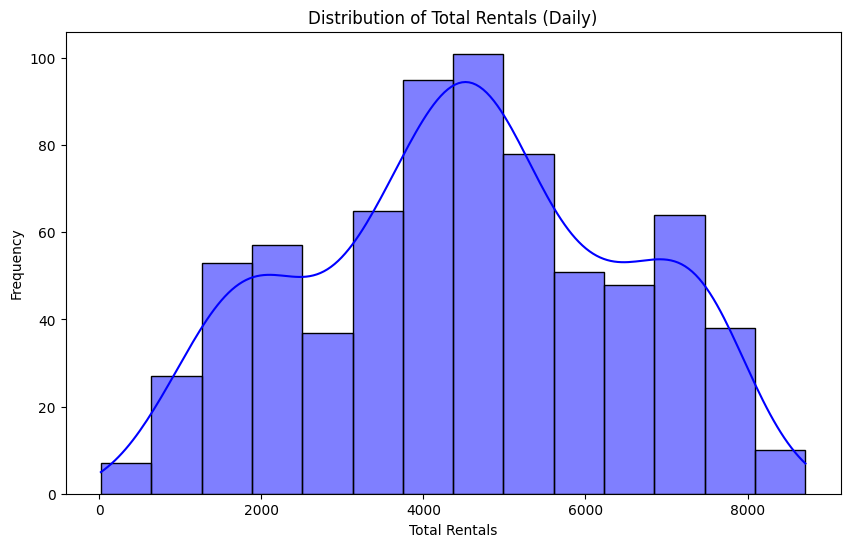

In [94]:
plt.figure(figsize=(10, 6))
sns.histplot(day_data['cnt'], kde=True, color='blue')
plt.title('Distribution of Total Rentals (Daily)')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.show()

Histogram dia atas menggambarkan distribusi total penyewaan sepeda. Berikut adalah beberapa insight yang dapat diambil:

1. **Distribusi Simetris**: Histogram menunjukkan distribusi yang mendekati simetris dengan bentuk seperti lonceng, yang menandakan mayoritas data jumlah penyewaan berkumpul di sekitar nilai rata-rata. Hal ini mengindikasikan pola distribusi normal.

2. **Frekuensi Tertinggi**: Puncak frekuensi terjadi pada rentang sekitar 4000 penyewaan per hari. Ini menunjukkan bahwa jumlah ini merupakan angka penyewaan sepeda yang paling umum.

3. **Rentang Penyewaan**: Jumlah penyewaan berkisar dari 0 hingga sekitar 8000, dengan sebagian besar penyewaan berada pada rentang antara 2000 hingga 6000.

4. **Nilai Ekstrim**: Frekuensi rendah pada kedua ujung distribusi (rentang sekitar 0 dan 8000) dapat mencerminkan hari-hari tertentu seperti liburan, event spesial, atau kondisi cuaca ekstrem yang memengaruhi pola penyewaan.

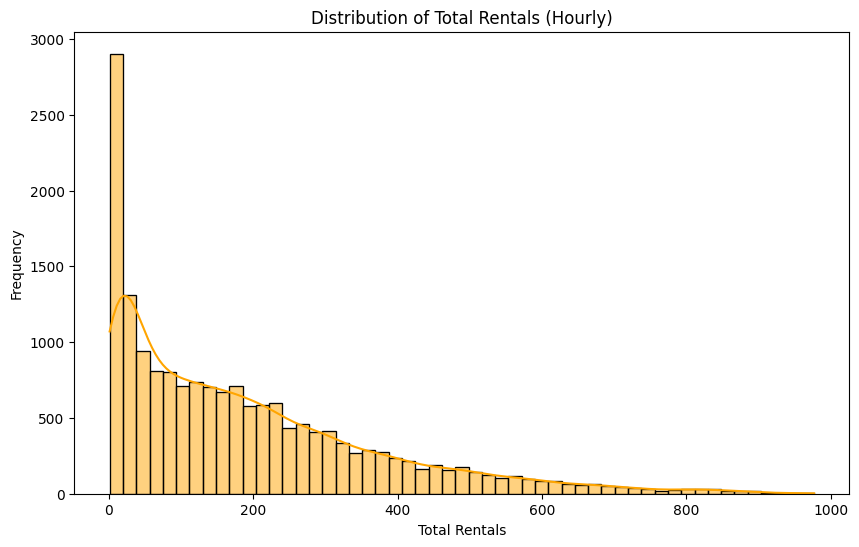

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(hour_data['cnt'], kde=True, color='orange')
plt.title('Distribution of Total Rentals (Hourly)')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.show()

Insight paling menonjol dari histogram ini adalah distribusi total penyewaan sepeda per jam yang **sangat tidak merata**, dengan karakteristik sebagai berikut:

1. **Frekuensi Tinggi pada Rentang Rendah**:
   - Sebagian besar penyewaan terjadi pada rentang rendah (di bawah 200 penyewaan per jam), dengan frekuensi tertinggi pada penyewaan mendekati nol. Hal ini menunjukkan bahwa terdapat banyak jam dalam sehari dengan aktivitas penyewaan yang rendah.

2. **Distribusi Tidak Simetris**:
   - Distribusi menunjukkan pola yang menurun dengan cepat setelah puncaknya, mengindikasikan bahwa penyewaan sepeda lebih sering terjadi dalam jumlah kecil per jam dibandingkan jumlah besar.

3. **Penyewaan yang Jarang pada Rentang Tinggi**:
   - Jumlah penyewaan di atas 400 per jam sangat jarang, mencerminkan bahwa volume penyewaan sepeda tinggi hanya terjadi pada jam-jam tertentu, kemungkinan besar saat jam sibuk atau di bawah kondisi spesifik seperti cuaca atau hari libur.

4. **Indikasi Aktivitas Sibuk pada Waktu Tertentu**:
   - Tren ini dapat mengindikasikan adanya puncak aktivitas pada waktu tertentu (seperti jam kerja pagi atau sore), yang relevan untuk analisis pola waktu.

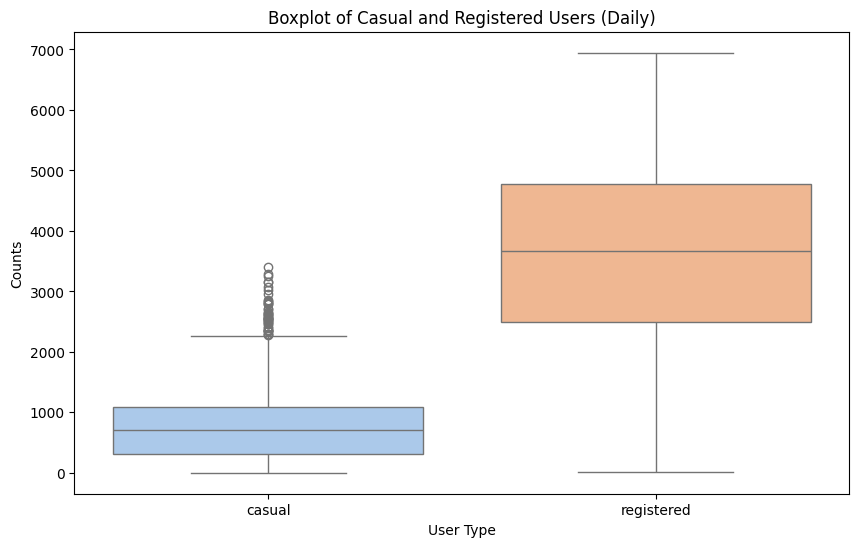

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_data[['casual', 'registered']], palette='pastel')
plt.title('Boxplot of Casual and Registered Users (Daily)')
plt.xlabel('User Type')
plt.ylabel('Counts')
plt.show()

Boxplot berikut menggambarkan distribusi jumlah pengguna sepeda berdasarkan dua kategori, yaitu **casual users** (pengguna kasual) dan **registered users** (pengguna terdaftar). Berikut adalah insight yang dapat diperoleh:

1. **Distribusi Pengguna Kasual**:
   - Median jumlah penyewaan pengguna kasual lebih rendah dibandingkan pengguna terdaftar, menunjukkan bahwa penyewaan oleh pengguna kasual biasanya lebih sedikit.
   - Rentang interkuartil (IQR) pengguna kasual lebih kecil, menunjukkan bahwa distribusi jumlah penyewaan lebih terkonsentrasi.
   - Terdapat banyak *outlier* pada pengguna kasual di atas kuartil atas, yang mungkin terjadi pada hari-hari khusus seperti akhir pekan, hari libur, atau event tertentu.

2. **Distribusi Pengguna Terdaftar**:
   - Median jumlah penyewaan pengguna terdaftar jauh lebih tinggi dibandingkan pengguna kasual, menunjukkan bahwa pengguna terdaftar cenderung lebih sering menggunakan layanan ini.
   - Rentang interkuartil pengguna terdaftar lebih besar, mencerminkan bahwa ada variasi lebih tinggi dalam jumlah penyewaan.
   - Tidak terdapat *outlier* yang signifikan pada pengguna terdaftar, yang menunjukkan pola penyewaan mereka lebih stabil.

3. **Perbandingan Antara Kategori**:
   - Jumlah penyewaan pengguna terdaftar secara konsisten lebih tinggi dibandingkan pengguna kasual.
   - Outlier pada pengguna kasual mengindikasikan adanya peristiwa yang meningkatkan penggunaan layanan oleh pengguna kasual, sementara pengguna terdaftar tetap konsisten.


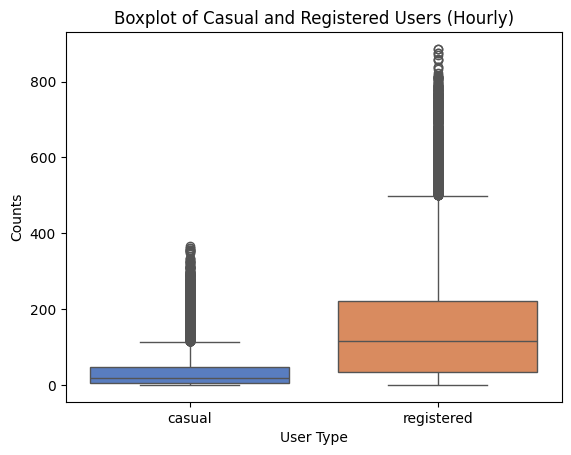

In [97]:
sns.boxplot(data=hour_data[['casual', 'registered']], palette='muted')
plt.title('Boxplot of Casual and Registered Users (Hourly)')
plt.xlabel('User Type')
plt.ylabel('Counts')
plt.show()

Terdapat banyak outlier pada kedua kategori, yang mengindikasikan adanya waktu tertentu dengan lonjakan aktivitas penyewaan. Ini kemungkinan besar terjadi pada jam sibuk seperti pagi atau sore hari, atau selama event khusus.


<ipython-input-98-661147f7403c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=day_data, palette='muted')


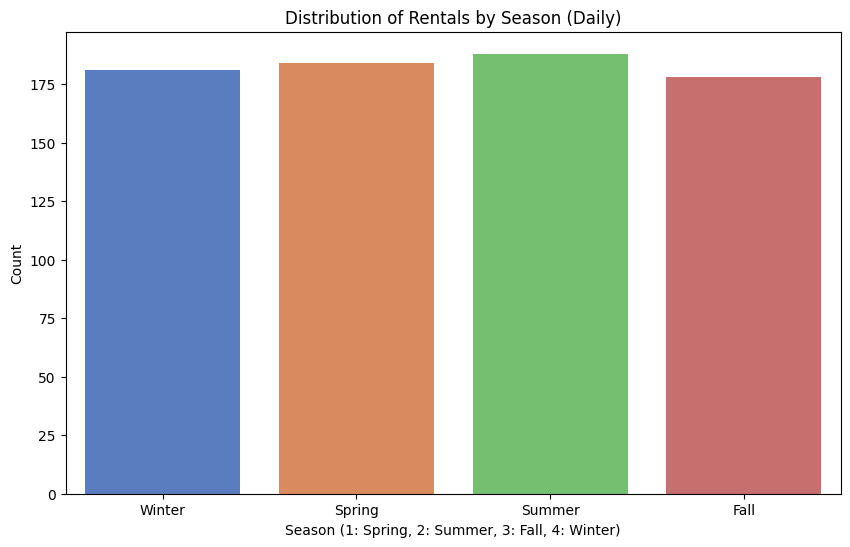

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=day_data, palette='muted')
plt.title('Distribution of Rentals by Season (Daily)')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Count')
plt.show()

Bar chart tersebut menggambarkan distribusi penyewaan sepeda berdasarkan musim. Berikut adalah beberapa insight yang dapat diambil:

1. **Jumlah yang Relatif Stabil**:
   - Distribusi penyewaan hampir merata di seluruh musim. Jumlah penyewaan terlihat seragam antara musim dingin (Winter), musim semi (Spring), musim panas (Summer), dan musim gugur (Fall).

2. **Musim Paling Populer**:
   - Musim panas (Summer) menunjukkan jumlah penyewaan yang sedikit lebih tinggi dibandingkan musim lainnya, yang mungkin disebabkan oleh cuaca yang lebih mendukung untuk aktivitas luar ruangan.

3. **Musim dengan Aktivitas Lebih Rendah**:
   - Musim gugur (Fall) memiliki jumlah penyewaan sedikit lebih rendah dibandingkan musim panas, meskipun perbedaannya tidak terlalu signifikan.

4. **Faktor Lingkungan**:
   - Cuaca pada musim tertentu dapat memengaruhi pola penyewaan. Contohnya, cuaca dingin di musim dingin mungkin membuat penyewaan sepeda tidak setinggi musim panas, tetapi jumlahnya masih tetap signifikan.


<ipython-input-99-7a9ad233afa0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hr', data=hour_data, palette='coolwarm')


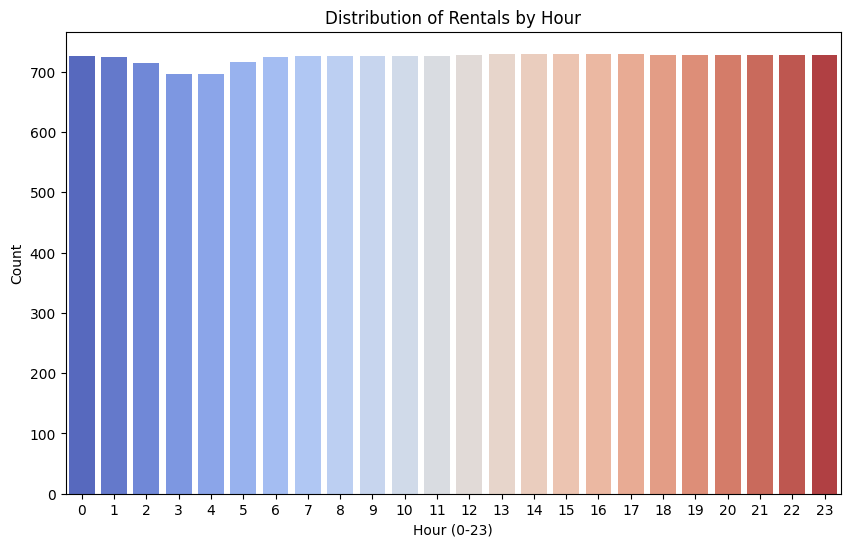

In [99]:
# Distribution of rentals by hour (Hourly)
plt.figure(figsize=(10, 6))
sns.countplot(x='hr', data=hour_data, palette='coolwarm')
plt.title('Distribution of Rentals by Hour')
plt.xlabel('Hour (0-23)')
plt.ylabel('Count')
plt.show()

Tidak ada jam tertentu yang secara signifikan lebih menonjol atau memiliki penyewaan yang jauh lebih tinggi dibandingkan jam lainnya. Ini menunjukkan bahwa layanan sepeda digunakan secara konsisten sepanjang hari.


<ipython-input-100-aa123bc5838e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weekday', data=day_data, palette='pastel')


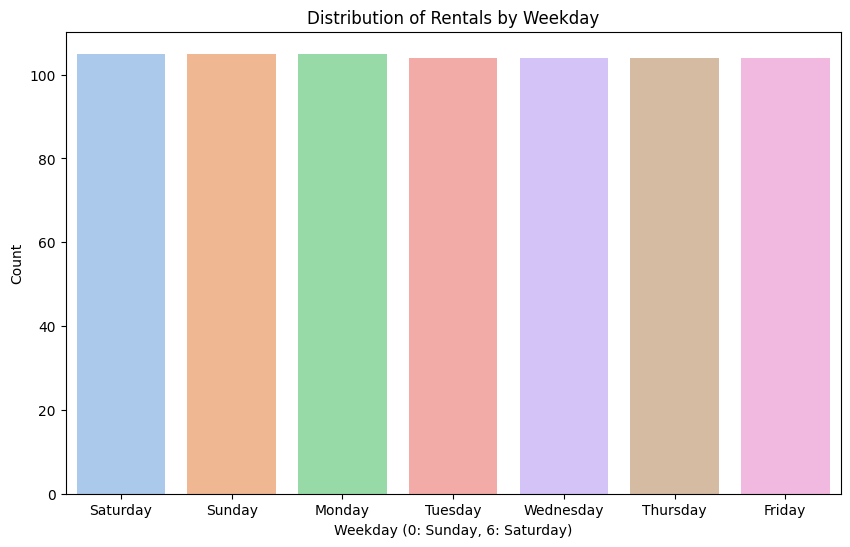

In [100]:
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=day_data, palette='pastel')
plt.title('Distribution of Rentals by Weekday')
plt.xlabel('Weekday (0: Sunday, 6: Saturday)')
plt.ylabel('Count')
plt.show()

Tidak ada perbedaan signifikan dalam jumlah penyewaan antara hari kerja (Senin hingga Jumat) dan akhir pekan (Sabtu dan Minggu). Ini menunjukkan bahwa layanan sepeda ini digunakan secara konsisten sepanjang minggu.

**Multivariate Analysis**

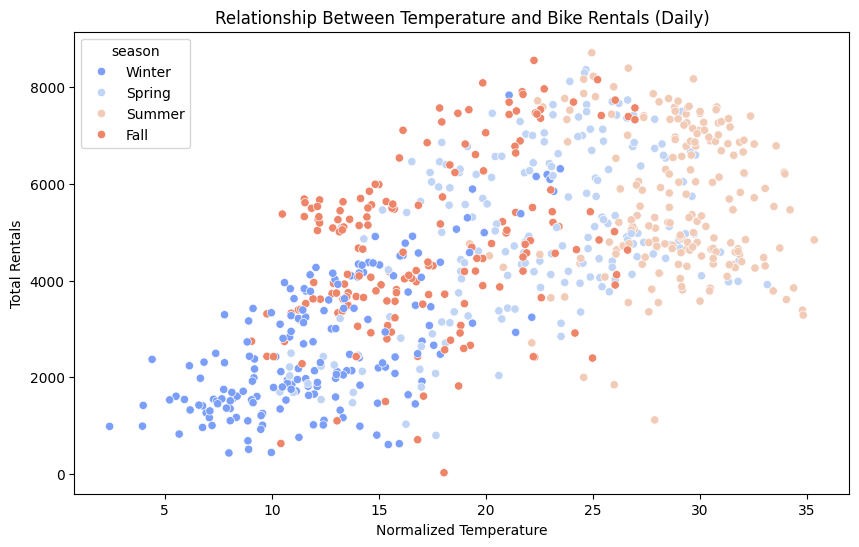

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data, hue='season', palette='coolwarm')
plt.title('Relationship Between Temperature and Bike Rentals (Daily)')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.show()

Insight yang paling menonjol dari scatterplot ini adalah **hubungan positif antara suhu dan jumlah penyewaan sepeda**, dengan beberapa poin penting:

1. **Jumlah Penyewaan Meningkat dengan Suhu**:
   - Secara umum, terdapat pola bahwa semakin tinggi suhu (normalized temperature), semakin tinggi jumlah penyewaan sepeda. Hal ini menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak aktivitas penyewaan.

2. **Perbedaan Antar Musim**:
   - Warna menunjukkan perbedaan antar musim:
     - Musim panas (*Summer*) dan musim semi (*Spring*) memiliki jumlah penyewaan yang lebih tinggi pada suhu yang sama dibandingkan dengan musim dingin (*Winter*).
     - Musim dingin memiliki distribusi yang lebih terkonsentrasi pada suhu rendah dan jumlah penyewaan yang lebih kecil.
   - Musim gugur (*Fall*) memiliki pola yang cukup mirip dengan musim semi.

3. **Variasi yang Lebih Tinggi pada Suhu Tinggi**:
   - Pada suhu tinggi (lebih dari 25), terdapat variasi yang lebih besar dalam jumlah penyewaan, kemungkinan disebabkan oleh faktor lain seperti kondisi cuaca ekstrem (hujan atau kelembaban).

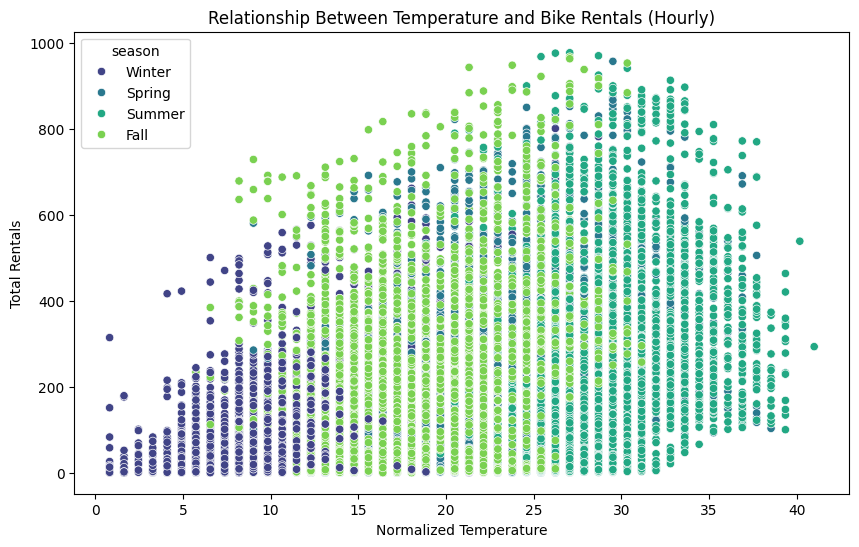

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_data, hue='season', palette='viridis')
plt.title('Relationship Between Temperature and Bike Rentals (Hourly)')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.show()

Insight paling menonjol dari scatterplot ini adalah **hubungan positif antara suhu (normalized temperature) dan jumlah penyewaan sepeda per jam (hourly rentals)**, dengan beberapa poin penting:

1. **Peningkatan Jumlah Penyewaan dengan Suhu**:
   - Secara umum, jumlah penyewaan meningkat seiring dengan kenaikan suhu, menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak aktivitas penyewaan sepeda.

2. **Variasi Berdasarkan Musim**:
   - Pada suhu yang sama, musim panas (*Summer*) dan musim semi (*Spring*) menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan musim dingin (*Winter*). Hal ini masuk akal karena cuaca di musim panas dan semi lebih mendukung aktivitas luar ruangan.
   - Musim gugur (*Fall*) memiliki pola yang menyerupai musim semi tetapi sedikit lebih tersebar.

3. **Distribusi Lebar pada Suhu Tinggi**:
   - Pada suhu tinggi (30–40), terdapat distribusi yang lebih lebar dalam jumlah penyewaan, mencerminkan adanya waktu tertentu dengan lonjakan aktivitas penyewaan (misalnya, jam sibuk atau akhir pekan).

4. **Penggunaan yang Rendah pada Suhu Dingin**:
   - Pada suhu rendah (<10), jumlah penyewaan tetap ada tetapi lebih kecil dibandingkan suhu sedang atau tinggi, kemungkinan disebabkan oleh cuaca dingin yang kurang nyaman untuk bersepeda.


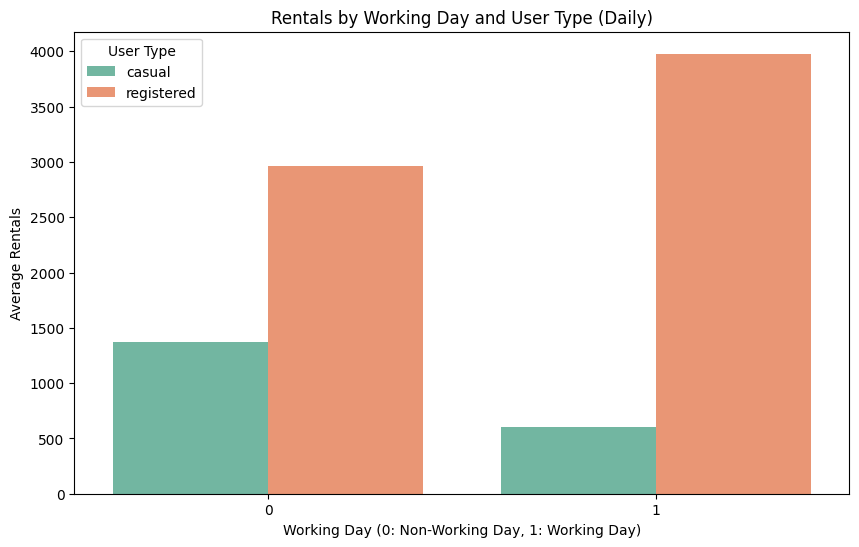

In [103]:
working_day_rentals_daily = day_data.groupby('workingday')[['casual', 'registered']].mean().reset_index()
working_day_rentals_melted_daily = working_day_rentals_daily.melt(id_vars='workingday', var_name='User Type', value_name='Average Rentals')
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='Average Rentals', hue='User Type', data=working_day_rentals_melted_daily, palette='Set2')
plt.title('Rentals by Working Day and User Type (Daily)')
plt.xlabel('Working Day (0: Non-Working Day, 1: Working Day)')
plt.ylabel('Average Rentals')
plt.show()

Insight paling menonjol dari grafik ini adalah adanya **pola yang jelas antara tipe pengguna (casual dan registered) dan hari kerja (working day)**:

1. **Pengguna Terdaftar Mendominasi pada Hari Kerja**:
   - Pada hari kerja (*working day*), penyewaan oleh pengguna terdaftar (*registered users*) jauh lebih tinggi dibandingkan pengguna kasual (*casual users*). Ini menunjukkan bahwa pengguna terdaftar lebih sering menggunakan layanan sepeda untuk keperluan rutin, seperti pergi ke tempat kerja atau sekolah.

2. **Pengguna Kasual Mendominasi pada Hari Libur**:
   - Pada hari libur (*non-working day*), penyewaan oleh pengguna kasual lebih tinggi dibandingkan hari kerja. Hal ini kemungkinan besar disebabkan oleh pengguna kasual yang menggunakan sepeda untuk kegiatan rekreasi atau santai pada akhir pekan.

3. **Perbedaan Pola Penggunaan**:
   - Grafik ini menunjukkan perbedaan yang signifikan dalam pola penggunaan antara kedua tipe pengguna, di mana pengguna terdaftar lebih konsisten menggunakan layanan ini pada hari kerja.

<ipython-input-104-152fc7b58210>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=day_data, palette='coolwarm')


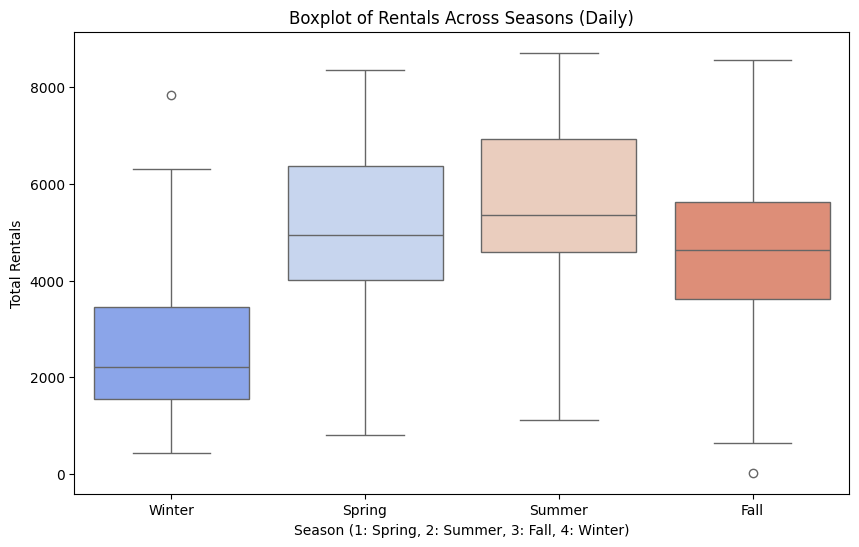

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_data, palette='coolwarm')
plt.title('Boxplot of Rentals Across Seasons (Daily)')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Total Rentals')
plt.show()

Terdapat outlier pada musim dingin dan musim semi, menunjukkan adanya hari-hari tertentu dengan aktivitas penyewaan yang jauh lebih tinggi dari biasanya, seperti event khusus atau kondisi cuaca yang tidak biasa.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja tren musiman dalam penyewaan sepeda, dan bagaimana variasinya antara pengguna terdaftar dan pengguna kasual?

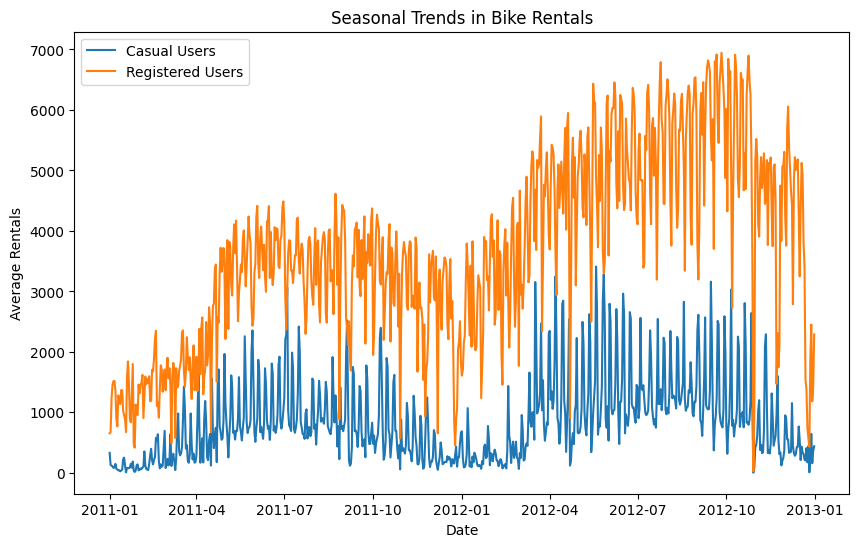

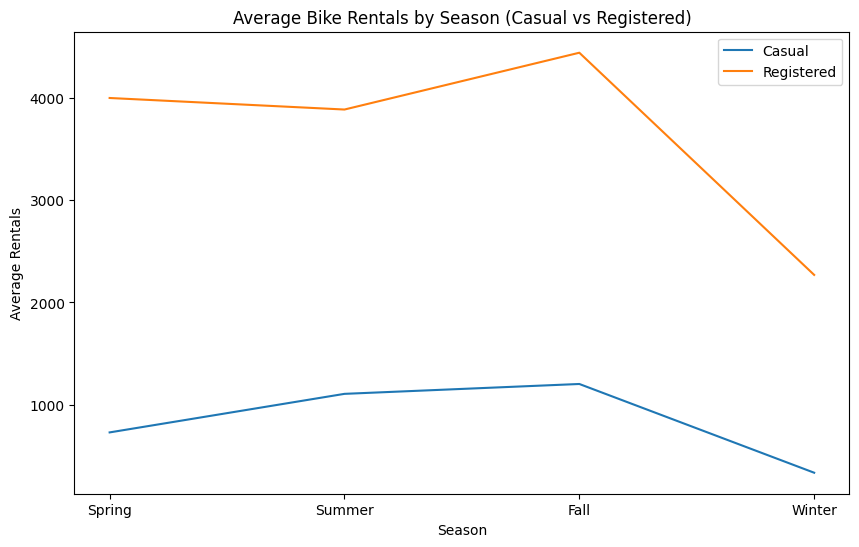

In [105]:
# Assuming 'day_data' DataFrame is already loaded and processed

plt.figure(figsize=(10, 6))
sns.lineplot(data=day_data, x='dteday', y='casual', label='Casual Users')
sns.lineplot(data=day_data, x='dteday', y='registered', label='Registered Users')
plt.title('Seasonal Trends in Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Average Rentals')
plt.legend()
plt.show()

seasonal_trends = day_data.groupby('season')[['casual', 'registered']].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=seasonal_trends, x='season', y='casual', label='Casual')
sns.lineplot(data=seasonal_trends, x='season', y='registered', label='Registered')
plt.title('Average Bike Rentals by Season (Casual vs Registered)')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks(seasonal_trends['season'], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend()
plt.show()

### Tren Musiman dalam Penyewaan Sepeda
1. **Pengguna Terdaftar (Registered Users):**
   - Aktivitas penyewaan lebih tinggi secara konsisten dibandingkan pengguna kasual di semua musim.
   - Penyewaan mencapai puncaknya selama musim gugur (Fall) dan musim panas (Summer).
   - Aktivitas penyewaan menurun secara signifikan selama musim dingin (Winter).

2. **Pengguna Kasual (Casual Users):**
   - Aktivitas penyewaan cenderung meningkat secara bertahap dari musim semi (Spring) hingga musim panas (Summer).
   - Aktivitas menurun pada musim gugur (Fall) dan mencapai titik terendah pada musim dingin (Winter).

### Variasi Antara Pengguna Terdaftar dan Kasual
- **Musim Panas (Summer)**: Kedua kelompok menunjukkan peningkatan aktivitas, dengan pengguna kasual lebih signifikan naik dibandingkan pengguna terdaftar.
- **Musim Gugur (Fall)**: Pengguna terdaftar menunjukkan peningkatan aktivitas lebih besar dibandingkan pengguna kasual.
- **Musim Dingin (Winter)**: Penurunan aktivitas paling tajam untuk kedua kelompok, namun lebih drastis pada pengguna kasual dibandingkan pengguna terdaftar.

### Kesimpulan
- **Musim Panas (Summer)** adalah periode dengan aktivitas penyewaan tertinggi untuk pengguna kasual.
- **Musim Gugur (Fall)** adalah puncak penyewaan untuk pengguna terdaftar.
- **Musim Dingin (Winter)** menunjukkan penurunan aktivitas signifikan untuk kedua kelompok.

### Pertanyaan 2: Bagaimana kondisi cuaca (suhu, kelembapan, kecepatan angin) memengaruhi total penyewaan sepeda?

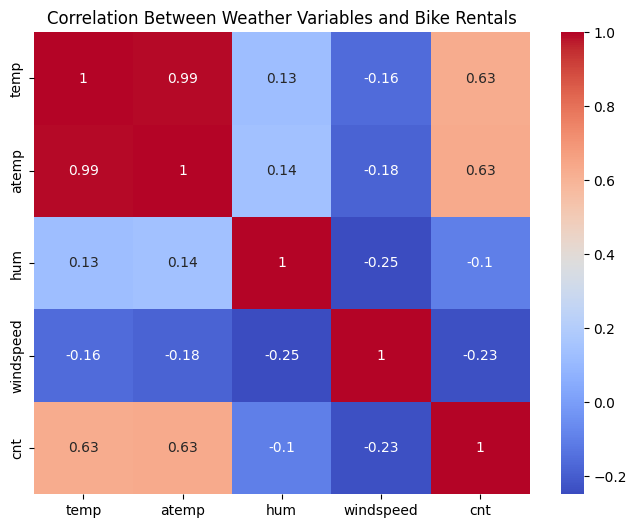

In [106]:
correlation_weather = day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_weather, annot=True, cmap='coolwarm')
plt.title('Correlation Between Weather Variables and Bike Rentals')
plt.show()


1. **Pengaruh Suhu**:
   - Variabel `temp` (suhu normalisasi) dan `atemp` (suhu terasa) memiliki korelasi positif yang cukup kuat dengan jumlah penyewaan sepeda (`cnt`), yaitu sebesar **0.63**. Hal ini menunjukkan bahwa penyewaan sepeda cenderung meningkat saat suhu meningkat, karena cuaca yang hangat lebih nyaman untuk aktivitas luar ruangan seperti bersepeda.

2. **Pengaruh Kelembapan (Humidity)**:
   - Variabel `hum` (kelembapan) memiliki korelasi negatif kecil dengan jumlah penyewaan sepeda (`cnt`), yaitu **-0.10**. Ini menunjukkan bahwa kelembapan tinggi dapat sedikit menurunkan aktivitas penyewaan, kemungkinan karena udara lembap membuat bersepeda menjadi kurang nyaman.

3. **Pengaruh Kecepatan Angin**:
   - Variabel `windspeed` (kecepatan angin) memiliki korelasi negatif yang lebih signifikan dengan penyewaan sepeda, yaitu **-0.23**. Hal ini menunjukkan bahwa angin kencang dapat mengurangi jumlah penyewaan sepeda, mungkin karena bersepeda dalam kondisi berangin lebih sulit atau tidak menyenangkan.

### **Kesimpulan**:
- **Suhu** adalah faktor cuaca yang paling memengaruhi jumlah penyewaan sepeda, dengan peningkatan penyewaan pada cuaca yang lebih hangat.
- **Kelembapan** dan **kecepatan angin** memiliki pengaruh negatif, meskipun tidak sebesar suhu, yang menunjukkan bahwa kondisi cuaca ini dapat mengurangi kenyamanan pengguna sepeda.

# Pertanyaan 3: Kapan jam puncak penyewaan selama hari kerja dibandingkan akhir pekan?

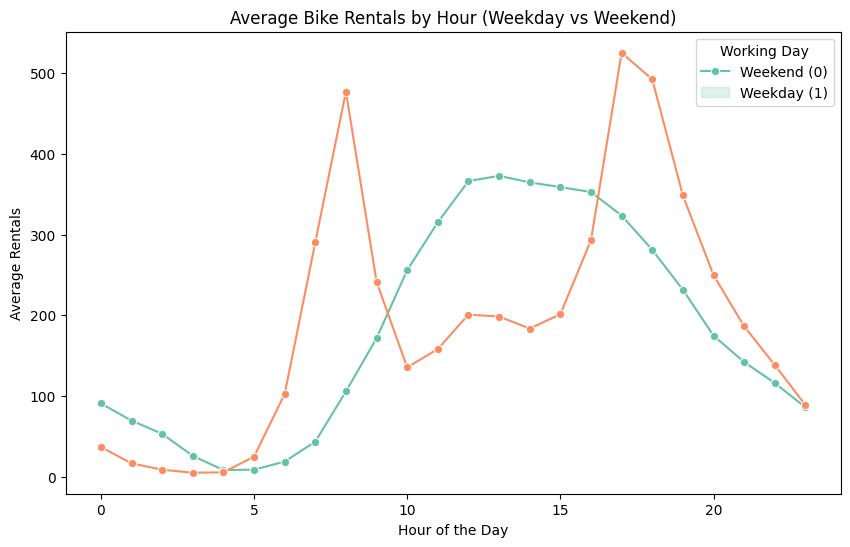

In [107]:
hourly_rentals = hour_data.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt', hue='workingday', marker='o', palette='Set2')
plt.title('Average Bike Rentals by Hour (Weekday vs Weekend)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.legend(title='Working Day', labels=['Weekend (0)', 'Weekday (1)'])
plt.show()


1. **Hari Kerja (Weekday)**:
   - Jam puncak terjadi **dua kali sehari**:
     - **Pagi hari (07:00 - 09:00)**: Kemungkinan besar pengguna menggunakan sepeda untuk perjalanan ke tempat kerja atau sekolah.
     - **Sore hari (17:00 - 19:00)**: Ketika pengguna pulang dari tempat kerja atau sekolah.
   - Pola ini mencerminkan penggunaan sepeda yang terkait dengan aktivitas rutin harian.

2. **Akhir Pekan (Weekend)**:
   - Jam puncak terjadi hanya **satu kali**, yaitu pada **siang hingga sore hari (11:00 - 16:00)**.
   - Pola ini menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas rekreasi atau santai pada akhir pekan.

### **Kesimpulan dan Strategi Operasional**:
- **Hari Kerja**:
  - Pastikan ketersediaan sepeda di area perumahan dan pusat bisnis selama jam sibuk pagi dan sore.
  - Tingkatkan layanan pemeliharaan dan distribusi sepeda pada waktu tersebut.

- **Akhir Pekan**:
  - Fokus pada area wisata, taman, dan lokasi rekreasi dengan meningkatkan jumlah sepeda yang tersedia dari siang hingga sore.
  - Promosikan paket rekreasi untuk pengguna kasual guna memaksimalkan aktivitas penyewaan.

# Pertanyaan 4: Bagaimana hari libur memengaruhi jumlah penyewaan sepeda, dan apakah ada perbedaan antara pengguna terdaftar dan kasual?

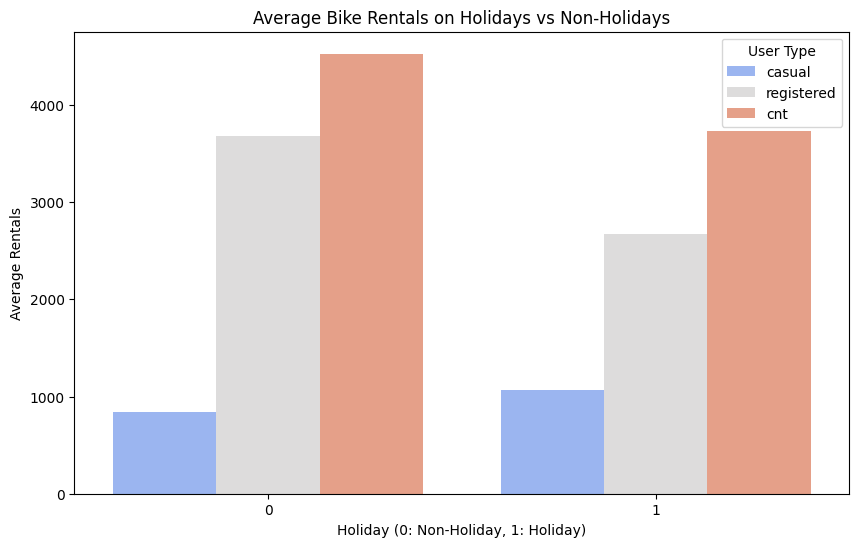

In [108]:
# Fixing the code for visualizing holiday impacts on bike rentals
holiday_effect = day_data.groupby('holiday')[['casual', 'registered', 'cnt']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    data=holiday_effect.melt(id_vars='holiday', var_name='User Type', value_name='Average Rentals'),
    x='holiday',
    y='Average Rentals',
    hue='User Type',
    palette='coolwarm'
)
plt.title('Average Bike Rentals on Holidays vs Non-Holidays')
plt.xlabel('Holiday (0: Non-Holiday, 1: Holiday)')
plt.ylabel('Average Rentals')
plt.legend(title='User Type')
plt.show()

1. **Dampak Hari Libur terhadap Total Penyewaan**:
   - Jumlah penyewaan sepeda rata-rata **lebih rendah pada hari libur** dibandingkan hari biasa (non-libur).
   - Hal ini mengindikasikan bahwa total aktivitas penyewaan menurun selama hari libur.

2. **Pengguna Terdaftar (Registered)**:
   - Penyewaan sepeda oleh pengguna terdaftar **turun secara signifikan pada hari libur** dibandingkan hari biasa. Ini mencerminkan bahwa pengguna terdaftar cenderung menggunakan sepeda untuk perjalanan rutin, seperti pergi ke kantor atau sekolah, yang tidak dilakukan pada hari libur.

3. **Pengguna Kasual (Casual)**:
   - Penyewaan oleh pengguna kasual **relatif stabil**, meskipun terdapat sedikit penurunan pada hari libur. Hal ini menunjukkan bahwa pengguna kasual lebih menggunakan sepeda untuk kegiatan rekreasi atau santai, yang tidak terlalu dipengaruhi oleh status hari kerja atau hari libur.

### **Kesimpulan dan Strategi Operasional**:
1. **Fokus pada Pengguna Kasual saat Hari Libur**:
   - Karena pengguna kasual tetap aktif, operator dapat menyediakan promosi khusus atau paket rekreasi selama hari libur untuk menarik lebih banyak pengguna kasual.

2. **Optimalisasi Lokasi Sepeda**:
   - Pastikan ketersediaan sepeda di lokasi rekreasi, taman, atau area wisata selama hari libur, karena ini adalah lokasi utama yang digunakan oleh pengguna kasual.

3. **Strategi untuk Pengguna Terdaftar**:
   - Perkenalkan kampanye atau program yang mendorong pengguna terdaftar untuk tetap aktif pada hari libur, misalnya dengan memberikan penghargaan atas penyewaan selama hari libur.

# Pertanyaan 5: Apa hubungan antara hari kerja dan pola penyewaan sepeda di berbagai musim?

<ipython-input-109-b5bd965181d4>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-109-b5bd965181d4>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


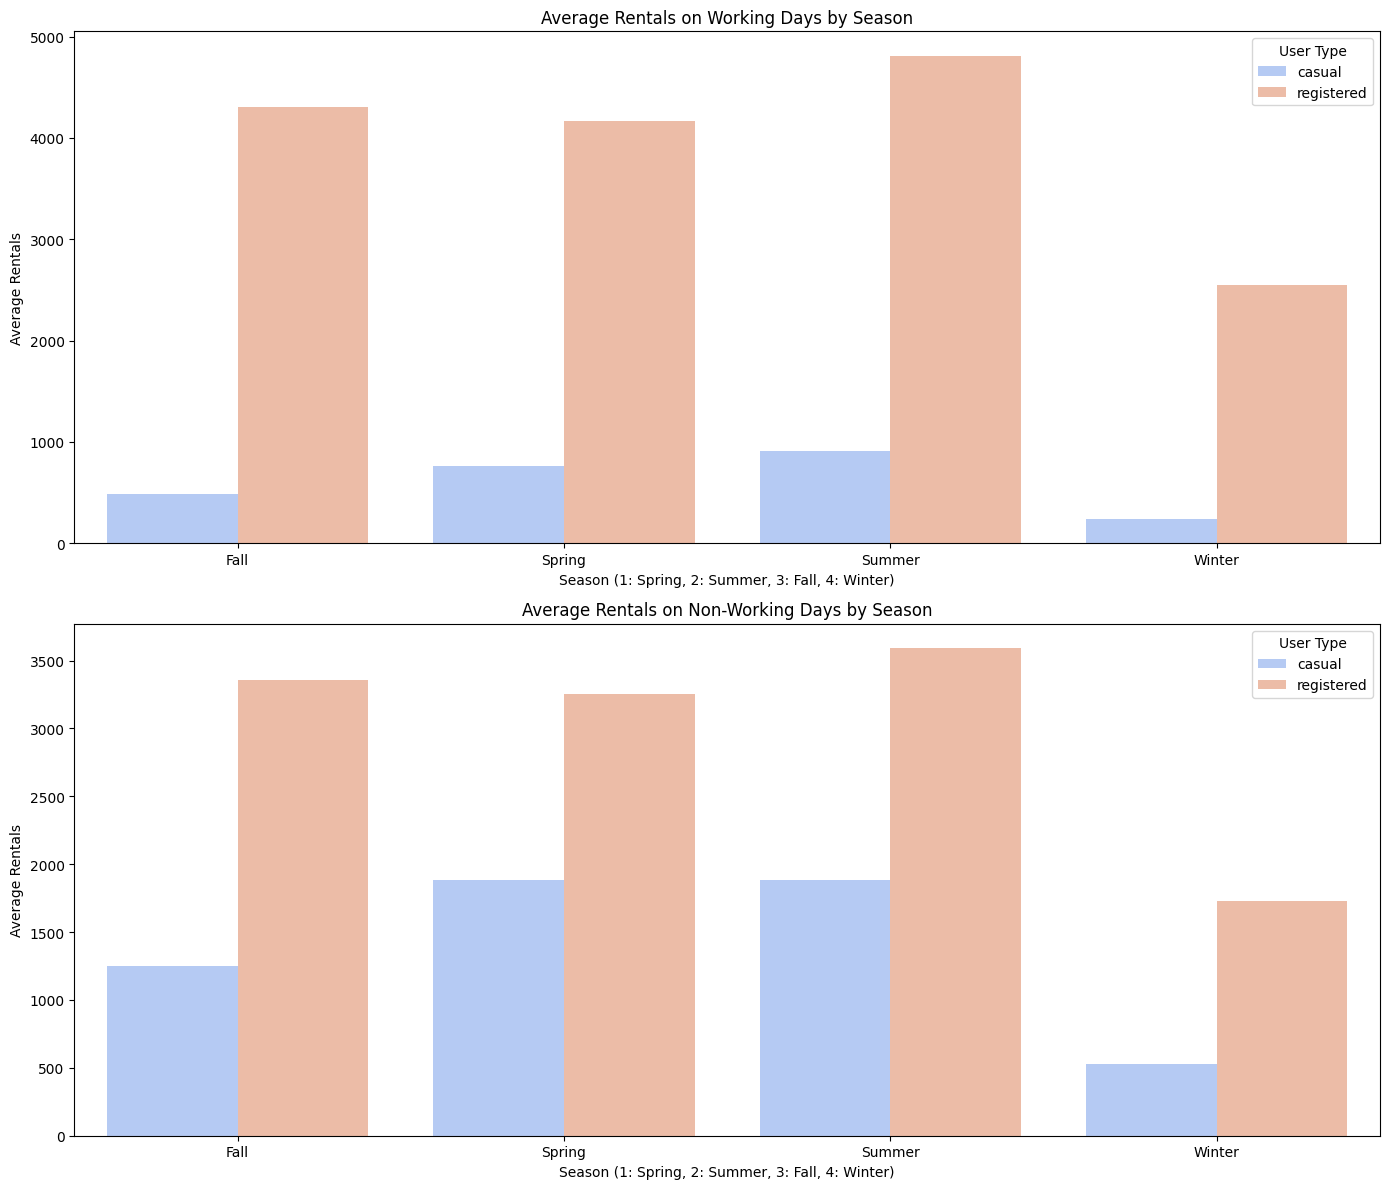

In [109]:
# Calculate average rentals per season for working and non-working days
working_season_rentals = day_data.groupby(['workingday', 'season'])[['casual', 'registered']].mean().reset_index()
working_season_rentals_melted = working_season_rentals.melt(id_vars=['workingday', 'season'], var_name='User Type', value_name='Average Rentals')

# Filter data untuk working day dan non-working day
working_day_data = working_season_rentals_melted[working_season_rentals_melted['workingday'] == 1]
non_working_day_data = working_season_rentals_melted[working_season_rentals_melted['workingday'] == 0]

# Visualisasi
plt.figure(figsize=(14, 12))

# Subplot untuk Working Day
plt.subplot(2, 1, 1)
sns.barplot(
    data=working_day_data,
    x='season',
    y='Average Rentals',
    hue='User Type',
    palette='coolwarm',
    ci=None
)
plt.title('Average Rentals on Working Days by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Average Rentals')
plt.legend(title='User Type')

# Subplot untuk Non-Working Day
plt.subplot(2, 1, 2)
sns.barplot(
    data=non_working_day_data,
    x='season',
    y='Average Rentals',
    hue='User Type',
    palette='coolwarm',
    ci=None
)
plt.title('Average Rentals on Non-Working Days by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Average Rentals')
plt.legend(title='User Type')

plt.tight_layout()
plt.show()


1. **Hari Kerja (Working Day)**:
   - Pada hari kerja, jumlah penyewaan sepeda oleh pengguna **terdaftar (registered)** lebih tinggi di semua musim dibandingkan dengan pengguna **kasual (casual)**.
   - Musim **panas (summer)** dan **semi (spring)** menunjukkan jumlah penyewaan tertinggi untuk pengguna terdaftar pada hari kerja. Ini mencerminkan aktivitas rutin seperti perjalanan ke tempat kerja atau sekolah.

2. **Hari Libur (Non-Working Day)**:
   - Pada hari libur, pengguna **kasual** mendominasi penyewaan sepeda dibandingkan pengguna **terdaftar**, terutama selama musim panas dan musim semi.
   - Hal ini menunjukkan bahwa pengguna kasual cenderung menggunakan sepeda untuk kegiatan rekreasi atau santai pada hari libur.

3. **Musim Dingin (Winter)**:
   - Penyewaan sepeda lebih rendah secara keseluruhan pada musim dingin, baik pada hari kerja maupun hari libur, untuk kedua jenis pengguna.

4. **Musim Panas (Summer)**:
   - Penyewaan tertinggi terjadi pada musim panas, dengan pengguna terdaftar mendominasi hari kerja dan pengguna kasual mendominasi hari libur.

### **Kesimpulan**:
- Hari kerja didominasi oleh pengguna **terdaftar** yang menggunakan sepeda untuk perjalanan rutin.
- Hari libur menarik lebih banyak pengguna **kasual**, terutama selama musim dengan cuaca lebih hangat (musim semi dan panas).
- Strategi operasional dapat difokuskan pada pengguna terdaftar selama hari kerja dan pengguna kasual selama hari libur, dengan peningkatan ketersediaan sepeda di lokasi rekreasi pada akhir pekan dan hari libur.


## Analisis Lanjutan (Opsional)

**Analisis Clustering Penggunaan Sepeda Berdasarkan Waktu dan Kondisi Cuaca**

Tujuan utama dari proses clustering ini adalah:

### 1. **Mengidentifikasi Pola Penggunaan Sepeda**
   - Dengan melakukan clustering, kita dapat memahami pola penggunaan sepeda berdasarkan faktor-faktor seperti:
     - Suhu (temp)
     - Kelembapan (hum)
     - Kecepatan angin (windspeed)
     - Hari dalam seminggu (day_of_week)
     - Bulan (month)
     - Rata-rata penyewaan per hari dalam seminggu (avg_cnt_per_dow)

### 2. **Ekstraksi Wawasan dari Data Waktu**
   - Ekstraksi informasi waktu, seperti hari dalam seminggu atau musim, memungkinkan kita mengidentifikasi:
     - Hari atau musim dengan penggunaan sepeda yang tinggi.
     - Hari atau musim dengan penggunaan sepeda yang rendah.

### 3. **Mengungkap Hubungan Antar Variabel**
   - Fitur interaksi, seperti `temp_hum_interaction`, membantu kita memahami bagaimana kombinasi variabel memengaruhi jumlah penyewaan sepeda (`cnt`).

### 4. **Pengelompokan Berdasarkan Karakteristik**
   - Dengan menggunakan Gaussian Mixture Model (GMM), kita dapat membuat kluster yang menggambarkan kelompok hari atau kondisi tertentu dengan pola penggunaan yang mirip.

### 5. **Dimensi Data yang Lebih Sederhana**
   - PCA digunakan untuk mereduksi dimensi, yang membantu mengungkap struktur data dan mempermudah visualisasi serta analisis kluster.

### 6. **Mendukung Keputusan Bisnis**
   - Hasil clustering dapat digunakan untuk:
     - Merancang promosi atau kebijakan tertentu pada waktu-waktu dengan penggunaan rendah.
     - Menyiapkan inventaris sepeda yang optimal berdasarkan kluster penggunaan yang teridentifikasi.

### **Langkah-Langkah Utama Proses**
1. **Ekstraksi Fitur Waktu**:
   - Menambahkan informasi waktu seperti hari dalam seminggu dan bulan.
   - Menghitung rata-rata penggunaan sepeda per hari dalam seminggu.
2. **Standarisasi Data**:
   - Memastikan semua fitur berada dalam skala yang sama menggunakan `StandardScaler`.
3. **PCA untuk Reduksi Dimensi**:
   - Mengurangi dimensi untuk mempermudah interpretasi visual dan analisis.
4. **Clustering dengan GMM**:
   - Menggunakan Gaussian Mixture Model untuk mengelompokkan data ke dalam beberapa kluster.
5. **Visualisasi dan Analisis Kluster**:
   - Menggunakan scatter plot untuk memvisualisasikan hasil kluster.
   - Melakukan analisis statistik pada setiap kluster untuk memahami karakteristiknya.

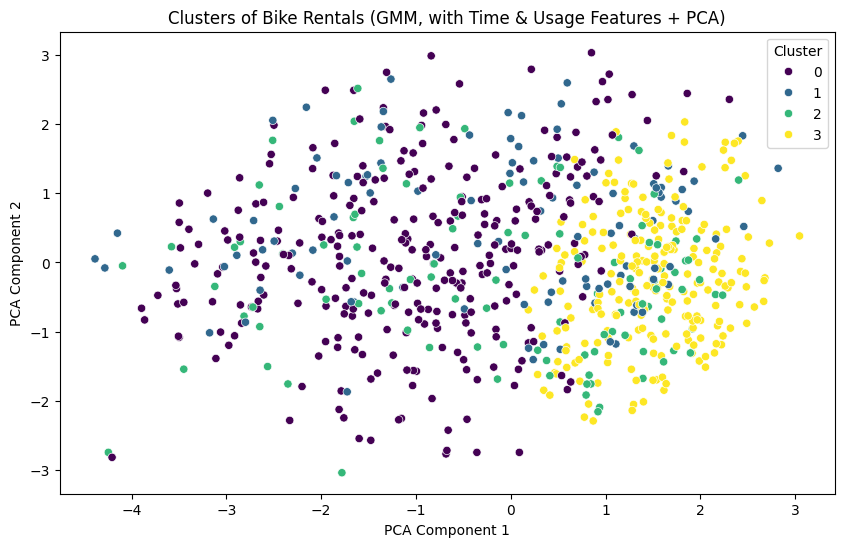

              temp        hum  windspeed          cnt  avg_cnt_per_dow
Cluster                                                               
0        15.339536  60.201334  13.812494  3598.510135      4549.085332
1        19.828732  62.765877  12.631502  4228.828571      4228.828571
2        19.705140  61.471352  12.961096  4620.359223      4550.542857
3        27.290875  66.773104  11.364072  5760.334802      4552.497037


In [110]:
# Contoh ekstraksi fitur waktu
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
day_data['day_of_week'] = day_data['dteday'].dt.dayofweek  # Senin=0, Minggu=6
day_data['month'] = day_data['dteday'].dt.month
day_data['season'] = day_data['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

# Misalnya, hitung rata-rata penyewaan per hari dalam seminggu (agg)
weekly_usage = day_data.groupby('day_of_week')['cnt'].mean().reset_index().rename(columns={'cnt': 'avg_cnt_per_dow'})
day_data = day_data.merge(weekly_usage, on='day_of_week', how='left')

# Kita bisa menambahkan fitur-fitur lain sesuai kebutuhan, misalnya interaksi antar variabel cuaca
day_data['temp_hum_interaction'] = day_data['temp'] * day_data['hum']

# Pilih fitur untuk clustering
features = day_data[['temp', 'hum', 'windspeed', 'cnt', 'day_of_week', 'month', 'avg_cnt_per_dow', 'temp_hum_interaction']]

# Standarisasi
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Opsional: lakukan PCA untuk mengurangi dimensi dan mencoba mengungkap struktur data
pca = PCA(n_components=3)  # Ambil 3 komponen utama, dapat disesuaikan
pca_features = pca.fit_transform(scaled_features)

# Clustering dengan Gaussian Mixture Model sebagai contoh
gmm = GaussianMixture(n_components=4, random_state=42)  # misalnya pakai 4 kluster
day_data['Cluster'] = gmm.fit_predict(pca_features)

# Visualisasi hasil kluster dengan plot 2D (mengambil 2 komponen PCA)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_features[:,0],
    y=pca_features[:,1],
    hue=day_data['Cluster'],
    palette='viridis'
)
plt.title('Clusters of Bike Rentals (GMM, with Time & Usage Features + PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Analisis kluster rata-rata
cluster_analysis = day_data.groupby('Cluster')[['temp', 'hum', 'windspeed', 'cnt', 'avg_cnt_per_dow']].mean()
print(cluster_analysis)



1. Pengaruh Suhu Terhadap Penggunaan:
Klaster 3 menunjukkan suhu rata-rata yang paling tinggi (±27.29°C) dan juga jumlah penggunaan sepeda (cnt) yang tertinggi (±5760). Ini mengindikasikan bahwa hari-hari dengan suhu yang lebih hangat cenderung mendorong penggunaan sepeda yang lebih tinggi. Sebaliknya, klaster 0 dengan suhu rata-rata paling rendah (±15.34°C) memiliki penggunaan yang paling rendah (±3599), menandakan suhu yang lebih dingin berkorelasi dengan penurunan penggunaan sepeda.

2. Kelembapan dan Kecepatan Angin:
Klaster 3 tidak hanya memiliki suhu tertinggi tetapi juga kelembapan yang lebih tinggi (±66.77%) dengan kecepatan angin yang relatif lebih rendah (±11.36). Kondisi ini sejalan dengan tingginya penggunaan sepeda. Sementara itu, klaster 0 dan 2 dengan kecepatan angin yang lebih tinggi (≥12.9) dan suhu lebih rendah cenderung memiliki tingkat penggunaan sepeda yang lebih rendah.

3. Perbedaan Subtil Antar Klaster Sedang:
Klaster 1 dan 2 memiliki suhu menengah (sekitar 19-20°C), kelembapan relatif sedang (61-63%), serta jumlah penggunaan yang relatif moderat (antara ±4229 hingga ±4620). Meski tingkat penggunaannya tidak seekstrem klaster 0 atau 3, mereka menunjukkan kondisi cuaca dan tingkat penggunaan yang “transisi,” yakni tidak terlalu dingin/rendah ataupun terlalu panas/tinggi.

4. Rata-Rata Penggunaan per Hari dalam Seminggu (avg_cnt_per_dow):
Menariknya, meskipun total penggunaan harian (cnt) dan kondisi cuaca berbeda, rata-rata penggunaan per hari dalam seminggu (avg_cnt_per_dow) pada semua klaster tidak sangat berbeda (berkisar sekitar 4200–4550). Namun, Klaster 1 cenderung sedikit lebih rendah (±4228) dibandingkan klaster lainnya. Hal ini bisa mengindikasikan pola penggunaan mingguan yang relatif stabil, terlepas dari perbedaan harian dalam suhu atau kelembapan.

## Conclusion

- **Conclution pertanyaan 1:** Penyewaan sepeda menunjukkan pola musiman yang jelas dengan variasi yang signifikan antara pengguna terdaftar dan kasual. Pengguna terdaftar secara konsisten memiliki tingkat aktivitas penyewaan yang lebih tinggi di semua musim, dengan puncak aktivitas pada musim gugur (Fall) dan musim panas (Summer), serta penurunan signifikan pada musim dingin (Winter). Sebaliknya, pengguna kasual cenderung lebih aktif selama musim panas, dengan peningkatan bertahap dari musim semi (Spring) hingga mencapai puncaknya pada musim panas, lalu menurun pada musim gugur dan mencapai titik terendah pada musim dingin. Musim panas menjadi puncak penyewaan untuk pengguna kasual, sementara musim gugur menjadi periode tersibuk bagi pengguna terdaftar. Musim dingin mencatat penurunan aktivitas paling tajam untuk kedua kelompok, dengan dampak yang lebih signifikan pada pengguna kasual dibandingkan pengguna terdaftar.

- **Conclution pertanyaan 2:** Suhu yang hangat terbukti sebagai faktor cuaca paling berpengaruh terhadap peningkatan jumlah penyewaan sepeda, sementara kelembapan tinggi dan kecepatan angin yang kencang memberikan efek negatif terhadap aktivitas ini. Kondisi kelembapan tinggi dan angin kencang dapat mengurangi kenyamanan pengguna dan, pada akhirnya, menurunkan tingkat penyewaan. Dengan memahami faktor-faktor ini, operator bike-sharing dapat menyesuaikan strategi operasional dan promosi, misalnya dengan menyediakan penawaran khusus atau diskon pada hari-hari dengan kondisi cuaca kurang ideal, serta memastikan ketersediaan sepeda dan layanan pendukung yang memadai saat cuaca cerah dan hangat. Dari sudut pandang pengambilan keputusan bisnis, memantau pola cuaca dan mengintegrasikannya ke dalam perencanaan (misalnya, pengaturan jumlah sepeda, penempatan stasiun, serta kampanye pemasaran musiman) dapat meningkatkan kepuasan pelanggan, memaksimalkan potensi pendapatan, serta menjaga daya saing layanan dalam berbagai kondisi cuaca.
- **Conclution pertanyaan 3:** Pola penggunaan sepeda menunjukkan perbedaan yang jelas antara hari kerja dan akhir pekan, mencerminkan kebutuhan pengguna yang berbeda. Pada hari kerja, jam puncak terjadi dua kali sehari, yaitu pagi (07:00-09:00) dan sore (17:00-19:00), yang menunjukkan bahwa sepeda digunakan sebagai moda transportasi untuk perjalanan rutin ke dan dari tempat kerja atau sekolah. Sebaliknya, pada akhir pekan, puncak penggunaan terjadi sekali, yaitu siang hingga sore (11:00-16:00), yang menandakan bahwa sepeda lebih sering digunakan untuk aktivitas rekreasi atau santai. Berdasarkan temuan ini, operator bike-sharing dapat menerapkan strategi operasional yang berbeda untuk mengoptimalkan layanan. Pada hari kerja, penting untuk memastikan ketersediaan sepeda yang cukup di area perumahan pada pagi hari dan di pusat bisnis pada sore hari, serta meningkatkan layanan pemeliharaan dan distribusi selama jam sibuk. Di akhir pekan, fokus dapat dialihkan ke area wisata, taman, dan lokasi rekreasi, dengan meningkatkan jumlah sepeda yang tersedia dan mempromosikan paket rekreasi untuk menarik pengguna kasual. Pendekatan ini tidak hanya akan meningkatkan efisiensi operasional, tetapi juga memaksimalkan potensi pendapatan dengan menyesuaikan layanan berdasarkan kebutuhan pengguna.
- Conclution pertanyaan 4: Data menunjukkan bahwa hari libur cenderung menurunkan total aktivitas penyewaan sepeda, terutama oleh pengguna terdaftar yang umumnya memanfaatkan layanan ini untuk perjalanan rutin. Meskipun demikian, pengguna kasual tetap relatif stabil pada hari libur, yang mengindikasikan potensi peningkatan penjualan melalui penawaran khusus yang berfokus pada aktivitas rekreasi. Oleh karena itu, operator bike-sharing dapat menyesuaikan strategi bisnis dengan menekankan pengembangan promosi yang mengundang lebih banyak pengguna kasual pada hari libur, serta memastikan ketersediaan sepeda di lokasi-lokasi rekreasi atau wisata. Di sisi lain, untuk mempertahankan partisipasi pengguna terdaftar, operator dapat memperkenalkan program insentif atau kampanye khusus yang mendorong mereka agar tetap aktif menggunakan layanan sepeda pada hari libur. Dengan demikian, pengoptimalan strategi berdasarkan segmentasi pengguna, lokasi, dan penawaran yang sesuai dapat memaksimalkan potensi pendapatan dan kepuasan pelanggan di berbagai kondisi hari.
- Conclution pertanyaan 5: Hasil analisis menunjukkan perbedaan pola penggunaan sepeda yang jelas antara hari kerja dan hari libur, serta pengaruh kuat faktor musim. Pengguna terdaftar mendominasi pada hari kerja di musim panas dan semi, memanfaatkan sepeda sebagai moda transportasi rutin. Sebaliknya, hari libur cenderung menarik pengguna kasual, khususnya pada musim panas dan semi, yang menggunakan sepeda untuk rekreasi. Pada musim dingin, tingkat penyewaan menurun secara keseluruhan, mengindikasikan tantangan untuk memaksimalkan pendapatan di tengah kondisi cuaca yang kurang mendukung. Dengan demikian, operator dapat menerapkan strategi yang lebih fleksibel, seperti memfokuskan upaya layanan dan ketersediaan sepeda di area bisnis atau perumahan pada hari kerja untuk pengguna terdaftar, serta meningkatkan ketersediaan sepeda di lokasi wisata atau rekreasi pada hari libur untuk menarik pengguna kasual. Optimalisasi musiman juga dapat dilakukan, misalnya dengan memprioritaskan inisiatif pemasaran dan promosi pada musim panas dan semi untuk memaksimalkan pendapatan dari kedua segmen pengguna.
